<a href="https://colab.research.google.com/github/visionNoob/Tensorflow_Tutorial/blob/master/Day_2/05%20-%20XOR%20problem_linear%20case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.enable_eager_execution()
tf.debugging.set_log_device_placement(True)
tf.set_random_seed(42)
np.random.seed(42)
tf.__version__

'1.14.0'

# XOR Problem

* XOR 로 표시되는 정보를 구분해보자

In [0]:
x_data = [[0., 0.],
          [0., 1.],
          [1., 0.],
          [1., 1.]]

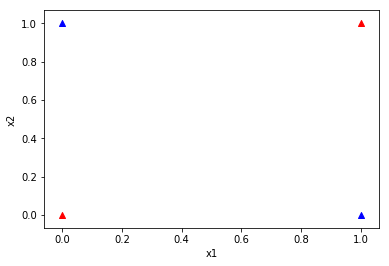

In [0]:
y_data = [[0.],
          [1.],
          [1.],
          [0.]]

plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Dataset 준비



In [0]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

Executing op TensorSliceDataset in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BatchDatasetV2 in device /job:localhost/replica:0/task:0/device:CPU:0


# Multi-layer perceptron

In [0]:
W1 = tf.Variable(tf.random_uniform([2, 5], -1.0, 1.0), name='weight1')
W2 = tf.Variable(tf.random_uniform([5, 4], -1.0, 1.0), name='weight2')
W3 = tf.Variable(tf.random_uniform([4, 1], -1.0, 1.0), name='weight3')

b1 = tf.Variable(tf.zeros([5]), name='bias1')
b2 = tf.Variable(tf.zeros([4]), name='bias2')
b3 = tf.Variable(tf.zeros([1]), name='bias3')

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sub in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Add in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarIsInitializedOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AssignVariableOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Fill in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/rep

## Layers 구성

In [0]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features, W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(layer1, W2) + b2)
    hypothesis = tf.sigmoid(tf.matmul(layer2, W3) + b3)
    
    return hypothesis


In [0]:
W_linear_1 = tf.Variable(tf.random_uniform([2, 1], -1.0, 1.0), name='weight1')
b_linear_1 = tf.Variable(tf.zeros([1]), name='bias1')

def linear_model(features):
    hypothesis = tf.sigmoid(tf.matmul(features, W_linear_1) + b_linear_1)
    return hypothesis

Executing op RandomUniform in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op VarHandleOp in device /job:localhost/replica:0/task:0/device:CPU:0


## Loss Function

In [0]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1 - labels) * tf.log(1 - hypothesis))
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.1)

In [0]:
def grad(hypothesis, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linear_model(features),labels)
    return tape.gradient(loss_value, [W1, W2, W3, b1, b2, b3])


In [0]:
def grad_linear(hypothesis, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linear_model(features),labels)
    return tape.gradient(loss_value, [W_linear_1, b_linear_1])

## Training


In [0]:
EPOCHS = 10000

for step in range(EPOCHS):
    for features, labels  in dataset:
        #grads = grad(neural_net(features), labels)
        grads = grad_linear(linear_model(features), labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W_linear_1, b_linear_1]))
        if step % 1000 == 0:
            #print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(neural_net(features),labels)))
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(linear_model(features),labels)))


Executing op Log in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Mean in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Neg in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Tile in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op RealDiv in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Reciprocal in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Shape in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op BroadcastGradientArgs in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Sum in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op AddN in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op SigmoidGrad in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op MatMul in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op ResourceApplyGradientDescent in device /job:localhost/replica:0/task:0/device:

In [0]:
def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [0]:
test_acc = accuracy_fn(neural_net(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Executing op Greater in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Testset Accuracy: 1.0000


In [0]:
test_acc = accuracy_fn(linear_model(x_data),y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Executing op Greater in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Cast in device /job:localhost/replica:0/task:0/device:CPU:0
Executing op Equal in device /job:localhost/replica:0/task:0/device:CPU:0
Testset Accuracy: 0.5000
